Load Dataset

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
train = pd.read_excel('train1.xlsx')
test = pd.read_excel('test1.xlsx')

In [ ]:
train.head()

,Data,AQI
0,2018-01-01 00:00:00,87.0
1,2018-01-01 01:00:00,85.0
2,2018-01-01 02:00:00,85.0
3,2018-01-01 03:00:00,98.0
4,2018-01-01 04:00:00,85.0


In [ ]:
test.head()

,Data,AQI
0,2020-05-01 00:00:00,48.0
1,2020-05-01 01:00:00,48.0
2,2020-05-01 02:00:00,48.0
3,2020-05-01 03:00:00,48.0
4,2020-05-01 04:00:00,49.0


Fill Missing Values

In [ ]:
train.isnull().sum()

Data      0
AQI     983
dtype: int64

In [ ]:
test.isnull().sum()

Data      0
AQI     210
dtype: int64

In [ ]:
train = train.interpolate(method ='linear', limit_direction ='forward')
test = test.interpolate(method ='linear', limit_direction ='forward')

In [ ]:
train.describe()

,AQI
count,20424.000000
mean,103.277247
std,45.965324
min,16.000000
25%,70.000000
50%,90.000000
75%,125.000000
max,487.000000


In [ ]:
test.describe()

,AQI
count,2208.000000
mean,60.147192
std,35.554438
min,41.000000
25%,49.000000
50%,54.000000
75%,60.000000
max,464.000000


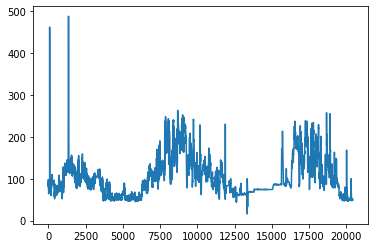

In [ ]:
train['AQI'].plot()

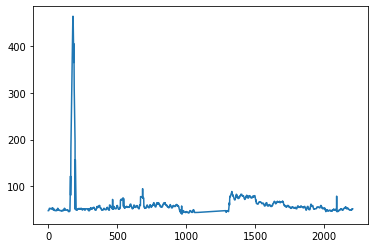

In [ ]:
test['AQI'].plot()

Scaling the data

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [ ]:
scaler.fit(train[['AQI']])

MinMaxScaler(copy=True, feature_range=(0, 1))

In [ ]:
scaled_train = pd.DataFrame(scaler.transform(train[["AQI"]]))

In [ ]:
scaled_test = pd.DataFrame(scaler.transform(test[['AQI']]))

Create Dataset

In [ ]:
def prepare_data(data,n_features):
  X, y, = [], []
  for i in range(len(data)):
    end = i + n_features
    if end > len(data) - 1:
      break
    X.append(data[i:end])
    y.append(data[end])
  return np.array(X), np.array(y)

In [ ]:
scaled_train.head()

,0
0,0.150743
1,0.146497
2,0.146497
3,0.174098
4,0.146497


In [ ]:
scaled_train_list = list(scaled_train[0])

In [ ]:
X_train, y_train = prepare_data(scaled_train_list, 72)

In [ ]:
X_train.shape,y_train.shape

((20352, 72), (20352,))

In [ ]:
X_train = X_train.reshape(X_train.shape[0],X_train.shape[1],1)

In [ ]:
X_train.shape

(20352, 72, 1)

## Model

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Bidirectional, Flatten, Dropout

In [ ]:
model = Sequential()
model.add(LSTM(100, return_sequences=True, input_shape=(72, 1)))
model.add(Dropout(0.2))
model.add(LSTM(100,return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(100))
model.add(Dropout(0.2))
model.add(Dense(units=1))

In [ ]:
# model.summary()
model.compile(loss='mean_squared_error', optimizer='adam')

In [ ]:
 model.fit(
    X_train, y_train,
    epochs=30,
    batch_size=128,
    shuffle=False
)

Epoch 1/30
159/159 [==============================] - 5s 15ms/step - loss: 0.0044
Epoch 2/30
159/159 [==============================] - 2s 14ms/step - loss: 0.0018
Epoch 3/30
159/159 [==============================] - 2s 14ms/step - loss: 0.0013
Epoch 4/30
159/159 [==============================] - 2s 14ms/step - loss: 9.3339e-04
Epoch 5/30
159/159 [==============================] - 2s 14ms/step - loss: 7.0410e-04
Epoch 6/30
159/159 [==============================] - 2s 14ms/step - loss: 6.0727e-04
Epoch 7/30
159/159 [==============================] - 2s 14ms/step - loss: 5.7796e-04
Epoch 8/30
159/159 [==============================] - 2s 14ms/step - loss: 5.3570e-04
Epoch 9/30
159/159 [==============================] - 2s 14ms/step - loss: 5.2208e-04
Epoch 10/30
159/159 [==============================] - 2s 14ms/step - loss: 4.9688e-04
Epoch 11/30
159/159 [==============================] - 2s 14ms/step - loss: 5.0411e-04
Epoch 12/30
159/159 [==============================] - 2s 14ms/s

In [ ]:
model.history.history.keys()

dict_keys(['loss'])

In [ ]:
import matplotlib.pyplot as plt

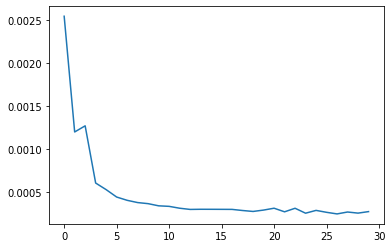

In [ ]:
plt.plot(model.history.history["loss"])
# plt.plot(model.history.history["val_loss"])
plt.show()

## Prediction for Test Data

In [ ]:
scaled_test_list = list(scaled_test[0])

In [ ]:
X_test, y_test = prepare_data(scaled_test_list, 72)

In [ ]:
X_test.shape,y_test.shape

((2136, 72), (2136,))

In [ ]:
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1],1)

In [ ]:
X_test.shape

(2136, 72, 1)

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
y_test

array([0.07430998, 0.07218684, 0.07218684, ..., 0.07643312, 0.07643312,
       0.07643312])

In [ ]:
from sklearn.metrics import mean_squared_error

In [ ]:
y_test = scaler.inverse_transform([y_test])
y_pred = scaler.inverse_transform(y_pred)

In [ ]:
y_test = y_test.reshape(-1,1)

In [ ]:
y_pred.shape

(2136, 1)

In [ ]:
np.sqrt(mean_squared_error(y_test,y_pred))

5.223792358294444

In [ ]:
y_test[-5:]

array([[51.],
       [52.],
       [52.],
       [52.],
       [52.]])

In [ ]:
y_pred[-5:]

array([[50.62891 ],
       [50.866856],
       [51.49966 ],
       [51.95412 ],
       [52.164692]], dtype=float32)